# Load sea ice data from url

In [2]:
import s3fs
import xarray as xr
import urllib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
with open("C:\\Users\\DominicHeslinRees\\Downloads\\URLs.txt", "r") as f:
    lines = [line.rstrip('\n') for line in f]
print("example file: "+str(lines[0]))
urls = [x for x in lines if 'ice_conc_nh_ease2-250_cdr-v2p0_' in x]
print(len(urls))
#https://rgw.met.no/6c6a817bd3bb47588bcc9e1221cb52b5:escience2022/Ada/conc/1979/01/ice_conc_nh_ease2-250_cdr-v2p0_197901021200.nc

example file: https://rgw.met.no/6c6a817bd3bb47588bcc9e1221cb52b5:escience2022/Ada/NorESM2-LM/chlos_Oday_NorESM2-LM_omip1_r1i1p1f1_gn_17000101-17091231.nc
11801


In [4]:
url = 'https://rgw.met.no/6c6a817bd3bb47588bcc9e1221cb52b5:escience2022/Ada/conc/1979/01/ice_conc_sh_ease2-250_cdr-v2p0_197901301200.nc'

In [5]:
local_filename, headers = urllib.request.urlretrieve(urls[2])
html = open(local_filename)
html.close()

If the URL points to a local file, the object will not be copied unless filename is supplied see https://docs.python.org/3/library/urllib.request.html for details

In [81]:
def get_xr_from_url(url):
    local_filename, headers = urllib.request.urlretrieve(url)
    html = open(local_filename)
    html.close()
    data = xr.open_dataset(local_filename)
    return data

In [82]:
list_xr = []
for url in urls[:5]:
    xr_url = get_xr_from_url(url)
    print(xr_url)
    list_xr.append(xr_url)
XR_all_years = xr.concat(list_xr, dim="time")

<xarray.Dataset>
Dimensions:                   (time: 1, nv: 2, xc: 432, yc: 432)
Coordinates:
  * time                      (time) datetime64[ns] 1979-01-02T12:00:00
  * xc                        (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                        (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
    lat                       (yc, xc) float32 ...
    lon                       (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid    int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    ice_conc                  (time, yc, xc) float64 ...
    raw_ice_conc_values       (time, yc, xc) float64 ...
    total_standard_error      (time, yc, xc) float64 ...
    smearing_standard_error   (time, yc, xc) float64 ...
    algorithm_standard_error  (time, yc, xc) float64 ...
    status_flag               (time, yc, xc) float32 ...
Attributes: (12/40)
    title:                     Sea Ice Concentration Climate 

In [83]:
XR_all_years

<xarray.Dataset>
Dimensions:                   (time: 5, nv: 2, xc: 432, yc: 432)
Coordinates:
  * time                      (time) datetime64[ns] 1979-01-02T12:00:00 ... 1...
  * xc                        (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                        (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
    lat                       (yc, xc) float32 16.62 16.82 17.02 ... 16.82 16.62
    lon                       (yc, xc) float32 -135.0 -135.1 ... 44.87 45.0
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid    (time) int32 -2147483647 ... -2147483647
    time_bnds                 (time, nv) datetime64[ns] 1979-01-02 ... 1979-0...
    ice_conc                  (time, yc, xc) float64 0.0 0.0 0.0 ... nan nan nan
    raw_ice_conc_values       (time, yc, xc) float64 nan nan nan ... nan nan nan
    total_standard_error      (time, yc, xc) float64 0.0 0.0 0.0 ... nan nan nan
    smearing_standard_error   (time, yc, xc) float64 0.0 0.0 0.0 ... nan nan nan
    algorithm_standard_error  (time, yc, xc) float64 0.0 0.0 0.0 ... nan nan nan
    status_flag               (time, yc, xc) float32 128.0 128.0 ... 1.0 1.0
Attributes: (12/40)
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  Earth Science > Cryosphere > Sea Ice > Sea Ice...
    keywords_vocabulary:       GCMD Science Keywords
    geospatial_lat_min:        16.62393
    ...                        ...
    tracking_id:               da2d2be2-4ba9-4a0e-aa3d-95ae9a395a4a
    naming_authority:          int.eumetsat
    Conventions:               CF-1.6 ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0

In [84]:
lats = XR_all_years['lat']
lons = XR_all_years['lon']
xc_max = XR_all_years['xc'].max()
xc_min = XR_all_years['xc'].min()
print(xc_max)
print(xc_min)

yc_max = XR_all_years['yc'].max()
yc_min = XR_all_years['yc'].min()
print(yc_max)
print(yc_min)

<xarray.DataArray 'xc' ()>
array(5387.5)
<xarray.DataArray 'xc' ()>
array(-5387.5)
<xarray.DataArray 'yc' ()>
array(5387.5)
<xarray.DataArray 'yc' ()>
array(-5387.5)


In [91]:
XR_all_years['ice_conc'][0,:,:].head(2)

<xarray.DataArray 'ice_conc' (yc: 2, xc: 2)>
array([[0., 0.],
       [0., 0.]])
Coordinates:
    time     datetime64[ns] 1979-01-02T12:00:00
  * xc       (xc) float64 -5.388e+03 -5.362e+03
  * yc       (yc) float64 5.388e+03 5.362e+03
    lat      (yc, xc) float32 16.62 16.82 16.82 17.02
    lon      (yc, xc) float32 -135.0 -135.1 -134.9 -135.0
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_error status_flag
    comment:              this field is the primary sea ice concentration est...

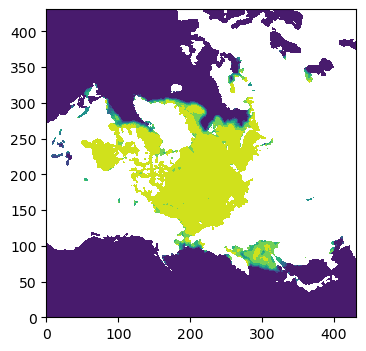

In [90]:
#x & y
fig = plt.figure(figsize=(4,4))
ax = plt.axes()
ax.contourf(XR_all_years['ice_conc'][0,:,:])
plt.show()

In [88]:
def make_simple_plot(XR_all_years, var='ice_conc', time_index=0):
    proj = ccrs.LambertAzimuthalEqualArea(central_latitude=90.0)
    fig = plt.figure(figsize=(8,4))
    ax = plt.axes(projection=proj)
    ax.set_global()
    
    xc_max = XR_all_years['xc'].max()
    xc_min = XR_all_years['xc'].min()
    yc_max = XR_all_years['yc'].max()
    yc_min = XR_all_years['yc'].min()
    
    ease_extent = [ xc_min, xc_max, yc_min, yc_max]
    ease_extent = [x*1000 for x in ease_extent] #km to metres
    ax.set_extent(ease_extent, crs=proj) 
    ax.coastlines(resolution="110m",linewidth=1)
    ax.gridlines(linestyle='--',color='black')
    ice_conc = XR_all_years.variables['ice_conc'][time_index,:,:]
    mapped_grid = ax.imshow(ice_conc, extent=ease_extent, transform=proj, 
              origin='upper', cmap='gist_rainbow')
    plt.title(str(var)+' time: '+str(time_index), size=14)
    cb = plt.colorbar(mapped_grid, orientation="vertical", pad=0.02, 
                      aspect=16, shrink=0.8)
    cb.set_label('%',size=12,rotation=0,labelpad=15)
    cb.ax.tick_params(labelsize=10)
    plt.tight_layout()
    plt.show()
    return fig

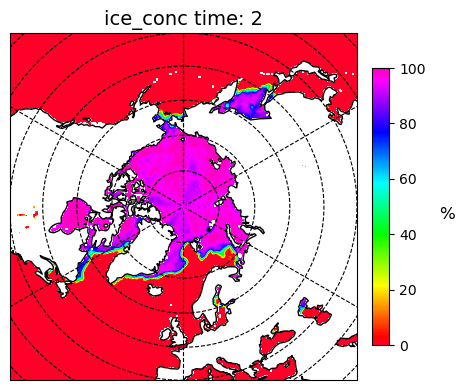

In [93]:
fig = make_simple_plot(XR_all_years, time_index=2)